<a href="https://colab.research.google.com/github/sanquaorg/Time-Series-Analysis-Forecasting--19CSE355/blob/main/Time_Series_Project_Analysis_of_Network_Outbound_Utilization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ch4-Load & Explore Time Series Data

                     OutboundUtilzation (%)
Timestamp                                  
2017-10-10 07:01:00                 96.2442
2017-10-10 07:21:00                 99.1131
2017-10-10 07:26:00                 97.2892
2017-10-10 07:31:00                 98.0286
2017-10-10 07:36:00                 99.5263
...                                     ...
2017-10-12 00:56:00                 75.9186
2017-10-12 01:01:00                 79.4772
2017-10-12 01:06:00                 77.4796
2017-10-12 01:11:00                 73.7555
2017-10-12 01:16:00                 92.8980

[500 rows x 1 columns]
25631
       OutboundUtilzation (%)
count            25631.000000
mean                60.372335
std                 22.517275
min                  0.000048
25%                 44.873850
50%                 62.100200
75%                 77.702150
max                 99.995500
                     OutboundUtilzation (%)
Timestamp                                  
2018-01-06 00:02:00                 34.8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


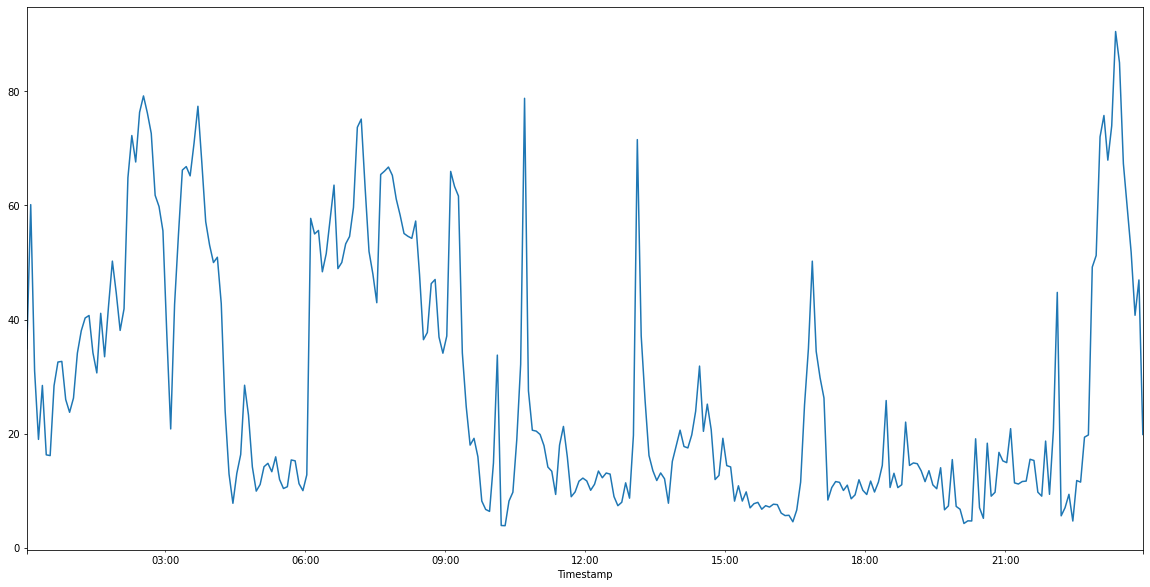

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Network Analytics.csv",index_col=0,parse_dates=True)
df2=df
import matplotlib.pyplot as plt
print(df.head(500))
print(df.size)
print(df.describe())
df1=df['2018-01-06']
print(df1)
plt.figure(figsize=(20,10))
df1["OutboundUtilzation (%)"].plot()

# plt.plot(df["Timestamp"],df["OutboundUtilzation (%)"])
plt.show()


#4.2,4.3.1,4.3.2,4.3.3,4.3.4

In [ ]:
#Handling Missing Values
missing_values=df.isnull()
# missing_values=df.isnull().sum()
print(missing_values)

#Hence there are no missing values

                     OutboundUtilzation (%)
Timestamp                                  
2017-10-10 07:01:00                   False
2017-10-10 07:21:00                   False
2017-10-10 07:26:00                   False
2017-10-10 07:31:00                   False
2017-10-10 07:36:00                   False
...                                     ...
2018-01-08 12:47:00                   False
2018-01-08 12:52:00                   False
2018-01-08 12:57:00                   False
2018-01-08 13:02:00                   False
2018-01-08 13:07:00                   False

[25631 rows x 1 columns]


In [ ]:
#5.4 Date Time Features
df['Year']=[df.index[i].year for i in range(len(df))]
df['month']=[df.index[i].month for i in range(len(df))]
df['day']=[df.index[i].day for i in range(len(df))]
df['Hours']=[df.index[i].hour for i in range(len(df))]
df['Minutes']=[df.index[i].minute for i in range(len(df))]
df
#seconds are not needed because for all the rows, seconds are 0



,OutboundUtilzation (%),Year,month,day,Hours,Minutes
Timestamp,,,,,,
2017-10-10 07:01:00,96.24420,2017,10,10,7,1
2017-10-10 07:21:00,99.11310,2017,10,10,7,21
2017-10-10 07:26:00,97.28920,2017,10,10,7,26
2017-10-10 07:31:00,98.02860,2017,10,10,7,31
2017-10-10 07:36:00,99.52630,2017,10,10,7,36
...,...,...,...,...,...,...
2018-01-08 12:47:00,4.20296,2018,1,8,12,47
2018-01-08 12:52:00,5.22635,2018,1,8,12,52
2018-01-08 12:57:00,5.38923,2018,1,8,12,57


In [ ]:
#5.5 Lag Features
# Predicting value at the next time (t+1) given the value at the current time (t)
# from pandas import DataFrame

#The addition of lag features like this is called sliding window method. Here window width=1 
temps = pd.DataFrame(df['OutboundUtilzation (%)'])
# print(temps)
dataframe = pd.concat([temps,temps.shift(3)],axis=1)
dataframe.column = ['t','t+1']
print(dataframe.head(10))

                     OutboundUtilzation (%)  OutboundUtilzation (%)
Timestamp                                                          
2017-10-10 07:01:00                 96.2442                     NaN
2017-10-10 07:21:00                 99.1131                     NaN
2017-10-10 07:26:00                 97.2892                     NaN
2017-10-10 07:31:00                 98.0286                 96.2442
2017-10-10 07:36:00                 99.5263                 99.1131
2017-10-10 07:41:00                 98.8014                 97.2892
2017-10-10 07:46:00                 87.9636                 98.0286
2017-10-10 07:51:00                 72.2780                 99.5263
2017-10-10 07:56:00                 64.3286                 98.8014
2017-10-10 08:01:00                 89.9914                 87.9636


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  if sys.path[0] == '':


Rolling [window=5,center=False,axis=0,method=single]
                     OutboundUtilzation (%)  \
Timestamp                                     
2017-10-10 07:01:00                 96.2442   
2017-10-10 07:21:00                 99.1131   
2017-10-10 07:26:00                 97.2892   
2017-10-10 07:31:00                 98.0286   
2017-10-10 07:36:00                 99.5263   
2017-10-10 07:41:00                 98.8014   
2017-10-10 07:46:00                 87.9636   
2017-10-10 07:51:00                 72.2780   
2017-10-10 07:56:00                 64.3286   
2017-10-10 08:01:00                 89.9914   

                     Rolling mean OutboundUtilzation (%)  
Timestamp                                                 
2017-10-10 07:01:00                                  NaN  
2017-10-10 07:21:00                                  NaN  
2017-10-10 07:26:00                                  NaN  
2017-10-10 07:31:00                                  NaN  
2017-10-10 07:36:00         

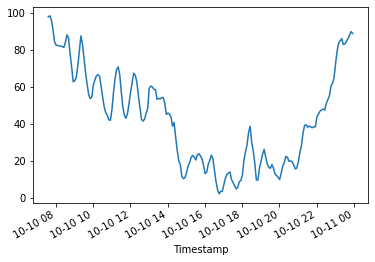

In [ ]:
#5.6 Rolling Window Statistics
# Rolling Mean - mean of the previous few values
temps = pd.DataFrame(df['OutboundUtilzation (%)'])

# shifted = temps.shift(1)
window = temps.rolling(window=5)
print(window)
means = window.mean()
dataframe=pd.concat([temps,means],axis=1)
dataframe.columns=['OutboundUtilzation (%)','Rolling mean OutboundUtilzation (%)']
print(dataframe.head(10))
df2=dataframe['2017-10-10']
print(df2.size)
df2['Rolling mean OutboundUtilzation (%)'].plot()
plt.show()

In [ ]:
#5.7 Expanding Window Statistics
#Can help with keeping track of the bounds of observable data.

Timestamp
2017-10-10    43.424780
2017-10-11    58.849542
2017-10-12    62.350373
2017-10-13    57.001592
2017-10-14    47.897637
2017-10-15    53.887392
2017-10-16    66.638281
2017-10-17    51.466656
2017-10-18    60.639587
2017-10-19    54.242174
Freq: D, Name: OutboundUtilzation (%), dtype: float64
91


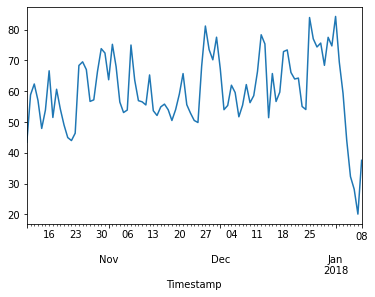

In [ ]:
#7.1,7.2,7.3 Resampling 
series = pd.read_csv("/content/Network Analytics.csv",header=0,index_col=0,parse_dates=True,squeeze=True)
# print(df2)
downsampled = series.resample('w').mean()
interpolated = downsampled.interpolate(method='spline',order=2)
print(interpolated.head(10))
print(interpolated.size)
interpolated.plot()
plt.show()



396
                     OutboundUtilzation (%)
Timestamp                                  
2018-01-06 00:02:00                 34.8528
2018-01-06 00:07:00                 60.1476
2018-01-06 00:12:00                 31.0023
2018-01-06 00:17:00                 18.9764
2018-01-06 00:22:00                 28.4355
2018-01-06 00:27:00                 16.2661
2018-01-06 00:32:00                 16.1345
2018-01-06 00:37:00                 28.3926
2018-01-06 00:42:00                 32.5413
2018-01-06 00:47:00                 32.6532
                     OutboundUtilzation (%)
Timestamp                                  
2018-01-06 00:02:00                3.551133
2018-01-06 00:07:00                4.096802
2018-01-06 00:12:00                3.434061
2018-01-06 00:17:00                2.943196
2018-01-06 00:22:00                3.347638
2018-01-06 00:27:00                2.789083
2018-01-06 00:32:00                2.780960
2018-01-06 00:37:00                3.346129
2018-01-06 00:42:00         

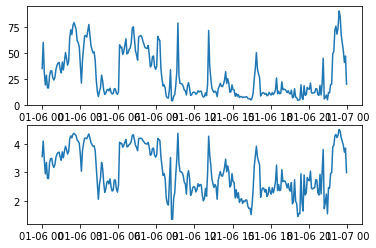

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# print(df2.size)
plt.subplot(211)
plt.plot(df1)
print(df1.head(10))

# sqrt = np.sqrt(df1)
# print(sqrt.head(10))
# plt.subplot(212)
# plt.plot(sqrt)
# plt.show()

loga = np.log(df1)
print(loga.head(10))
plt.subplot(212)
plt.plot(loga)
plt.show()


                     OutboundUtilzation (%)
Timestamp                                  
2018-01-06 00:02:00                 34.8528
2018-01-06 00:07:00                 60.1476
2018-01-06 00:12:00                 31.0023
2018-01-06 00:17:00                 18.9764
2018-01-06 00:22:00                 28.4355
...                                     ...
2018-01-06 23:37:00                 59.4541
2018-01-06 23:42:00                 51.7767
2018-01-06 23:47:00                 40.7399
2018-01-06 23:52:00                 46.9408
2018-01-06 23:57:00                 19.8402

[288 rows x 1 columns]
<class 'numpy.ndarray'>


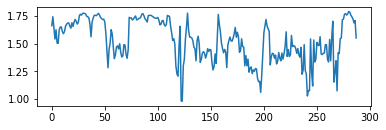

In [ ]:
from scipy.stats import boxcox
print(df1)
df3=boxcox(df1['OutboundUtilzation (%)'],lmbda=-0.5)
print(type(df3))
plt.subplot(211)
plt.plot(df3)
plt.show()

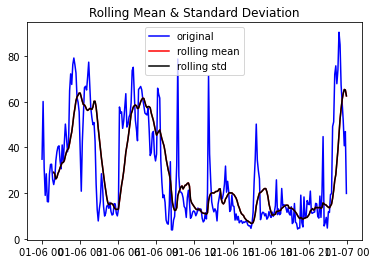

Results:
Test Statistic                   -4.208264
P-Value                           0.000638
#Lags Used                        0.000000
Number Of Observations Used:    287.000000
Critical Value (1%)              -3.453342
Critical Value (5%)              -2.871664
Critical Value (10%)             -2.572164
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
# print(df1)
ts = df1["OutboundUtilzation (%)"]
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(12).mean()
  rolstd = timeseries.rolling(12).std()

  orig = plt.plot(timeseries,color='blue',label='original')
  mean = plt.plot(rolmean,color='red',label='rolling mean')
  std = plt.plot(rolstd,color='black',label='rolling std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  #Dickey Fuller Test
  print("Results:")
  dftest = adfuller(timeseries,autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','P-Value','#Lags Used','Number Of Observations Used:'])
  for key,values in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = values
  print(dfoutput)

test_stationarity(df1)

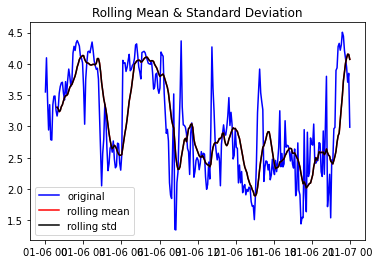

Results:
Test Statistic                   -2.734860
P-Value                           0.068198
#Lags Used                        8.000000
Number Of Observations Used:    279.000000
Critical Value (1%)              -3.454008
Critical Value (5%)              -2.871956
Critical Value (10%)             -2.572320
dtype: float64


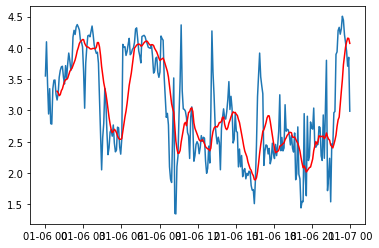

In [ ]:
df1_log = np.log(df1)
test_stationarity(df1_log)
moving_avg = df1_log.rolling(12).mean()  #MOVING AVERAGE OF THE LOGGED TRANSFORMS
plt.plot(df1_log)
plt.plot(moving_avg,color='red')

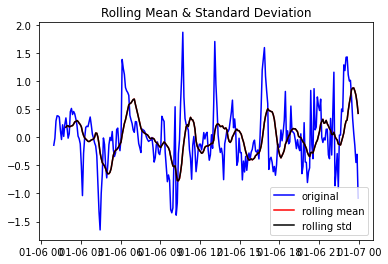

Results:
Test Statistic                   -5.089882
P-Value                           0.000015
#Lags Used                       12.000000
Number Of Observations Used:    264.000000
Critical Value (1%)              -3.455365
Critical Value (5%)              -2.872551
Critical Value (10%)             -2.572638
dtype: float64


In [ ]:
df1_log_moving_avg_diff = df1_log - moving_avg
df1_log_moving_avg_diff = df1_log_moving_avg_diff.dropna()
# print(moving_avg)
# print(df1_log_moving_avg_diff)
test_stationarity(df1_log_moving_avg_diff)

                     OutboundUtilzation (%)
Timestamp                                  
2018-01-06 00:02:00                3.551133
2018-01-06 00:07:00                3.846704
2018-01-06 00:12:00                3.685649
2018-01-06 00:17:00                3.451286
2018-01-06 00:22:00                3.423125
...                                     ...
2018-01-06 23:37:00                3.923928
2018-01-06 23:42:00                3.927468
2018-01-06 23:47:00                3.893582
2018-01-06 23:52:00                3.886706
2018-01-06 23:57:00                3.748399

[288 rows x 1 columns]


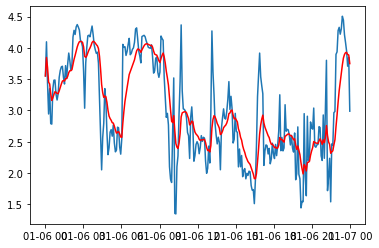

In [ ]:
expwighted_avg = df1_log.ewm(span=12).mean()
# print(expwighted_avg)
plt.plot(df1_log)
plt.plot(expwighted_avg,color='red')
plt.show()

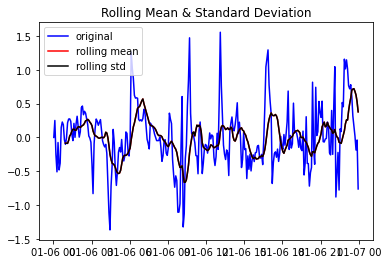

Results:
Test Statistic                   -5.073657
P-Value                           0.000016
#Lags Used                       12.000000
Number Of Observations Used:    275.000000
Critical Value (1%)              -3.454355
Critical Value (5%)              -2.872108
Critical Value (10%)             -2.572401
dtype: float64


In [ ]:
df1_log_ewma_diff = df1_log-expwighted_avg
# print(df1_log_ewma_diff)
test_stationarity(df1_log_ewma_diff)

#VISUALIZATION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Network Analytics.csv",index_col=0,parse_dates=True)
df

,OutboundUtilzation (%)
Timestamp,
2017-10-10 07:01:00,96.24420
2017-10-10 07:21:00,99.11310
2017-10-10 07:26:00,97.28920
2017-10-10 07:31:00,98.02860
2017-10-10 07:36:00,99.52630
...,...
2018-01-08 12:47:00,4.20296
2018-01-08 12:52:00,5.22635
2018-01-08 12:57:00,5.38923


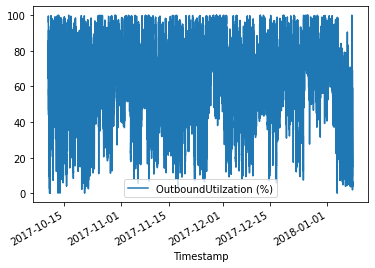

In [ ]:
df.plot()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Network Analytics.csv',parse_dates=True)
# print(df)
# print(df['OutboundUtilzation (%)'])
df['Timestamp']=pd.to_datetime(df['Timestamp'])


df['new_date'] = [d.date() for d in df['Timestamp']]
df['new_time'] = [d.time() for d in df['Timestamp']]
print(type(df['new_date']))
print(df)



<class 'pandas.core.series.Series'>
                Timestamp  OutboundUtilzation (%)    new_date  new_time
0     2017-10-10 07:01:00                96.24420  2017-10-10  07:01:00
1     2017-10-10 07:21:00                99.11310  2017-10-10  07:21:00
2     2017-10-10 07:26:00                97.28920  2017-10-10  07:26:00
3     2017-10-10 07:31:00                98.02860  2017-10-10  07:31:00
4     2017-10-10 07:36:00                99.52630  2017-10-10  07:36:00
...                   ...                     ...         ...       ...
25626 2018-01-08 12:47:00                 4.20296  2018-01-08  12:47:00
25627 2018-01-08 12:52:00                 5.22635  2018-01-08  12:52:00
25628 2018-01-08 12:57:00                 5.38923  2018-01-08  12:57:00
25629 2018-01-08 13:02:00                35.50460  2018-01-08  13:02:00
25630 2018-01-08 13:07:00                58.87990  2018-01-08  13:07:00

[25631 rows x 4 columns]
